In [ ]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import random
import pickle
import time

In [47]:
pickle_in = open('ignore_folder/train_X.pickle', 'rb')
Xtrain = pickle.load(pickle_in)
pickle_in = open('ignore_folder/train_y.pickle', 'rb')
ytrain = pickle.load(pickle_in)

In [48]:
type(Xtrain)

numpy.ndarray

In [49]:
Xtrain.shape

(1965, 65, 79)

In [50]:
type(Xtrain[0])

numpy.ndarray

In [51]:
type(ytrain)

list

In [52]:
ytrain = np.asarray(ytrain)

In [53]:
type(ytrain)

numpy.ndarray

In [23]:
ytrain[:10]

array([6, 7, 2, 4, 5, 1, 5, 4, 6, 5])

In [24]:
Xtrain[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

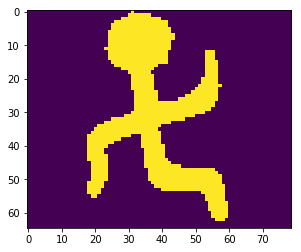

In [25]:
plt.imshow(Xtrain[0])

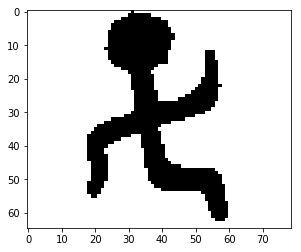

In [26]:
plt.imshow(Xtrain[0], cmap = plt.cm.binary)

In [27]:
Xtest = Xtrain[:100]

In [28]:
ytest = ytrain[:100]

In [29]:
len(Xtrain)

1965

In [30]:
len(Xtrain[:100])

100

In [31]:
len(Xtrain[:-100])

1865

In [32]:
len(Xtrain[0:-100])

1865

In [33]:
Xtrain = Xtrain[0:-100]

In [34]:
ytrain = ytrain[0:-100]

In [57]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=Xtrain[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(8, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Name = "Chinese-Characters-NN-128x3-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

In [58]:
model.fit(Xtrain, ytrain, epochs=20, validation_split=0.3, callbacks=[tensorboard])

Train on 1375 samples, validate on 590 samples
Epoch 1/20
1375/1375 [==============================] - 1s 898us/step - loss: 13.7893 - acc: 0.1440 - val_loss: 14.0829 - val_acc: 0.1254
Epoch 2/20
1375/1375 [==============================] - 1s 614us/step - loss: 13.8209 - acc: 0.1411 - val_loss: 14.0692 - val_acc: 0.1271
Epoch 3/20
1375/1375 [==============================] - 1s 618us/step - loss: 13.9701 - acc: 0.1331 - val_loss: 15.1619 - val_acc: 0.0593
Epoch 4/20
1375/1375 [==============================] - 1s 527us/step - loss: 15.0162 - acc: 0.0684 - val_loss: 15.1619 - val_acc: 0.0593
Epoch 5/20
1375/1375 [==============================] - 1s 508us/step - loss: 15.0162 - acc: 0.0684 - val_loss: 15.1619 - val_acc: 0.0593
Epoch 6/20
1375/1375 [==============================] - 1s 624us/step - loss: 15.0162 - acc: 0.0684 - val_loss: 15.1619 - val_acc: 0.0593
Epoch 7/20
1375/1375 [==============================] - 1s 664us/step - loss: 15.0162 - acc: 0.0684 - val_loss: 15.1619 - val

In [40]:
val_loss, val_acc = model.evaluate(Xtest, ytest)
print(val_loss, val_acc)

100/100 [==============================] - 0s 1ms/step
8.05904764175415 0.5
